In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv(r"C:\Users\user\Downloads\train (1).csv")
test = pd.read_csv(r"C:\Users\user\Downloads\test (1).csv")

training['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.NaN
all_data = pd.concat([training,test])

In [3]:
%matplotlib inline
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_test
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1.0
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.0
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.0
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1.0
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.0
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.0
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.0


In [6]:
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

In [7]:
df_num = training[['MSSubClass','LotFrontage','LotArea','OverallQual', 'BsmtFinSF2','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond' ,'YearBuilt' ,'YearRemodAdd','MasVnrArea','BsmtFinSF1','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold' ,'SalePrice']]
df_cat = training[['MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature','PoolQC','SaleType',
       'SaleCondition']]

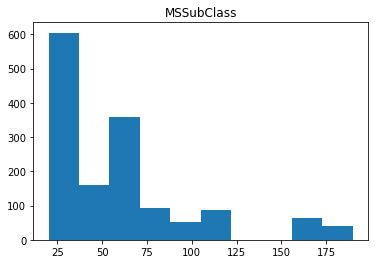

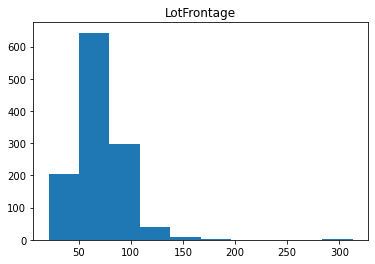

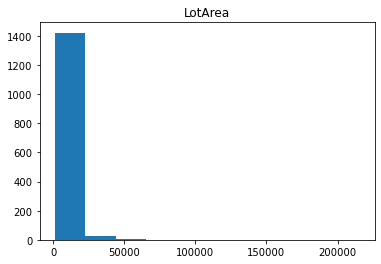

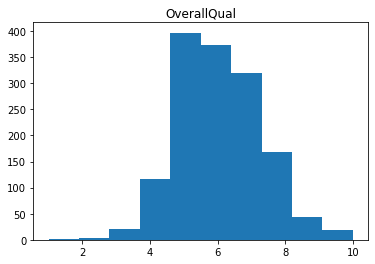

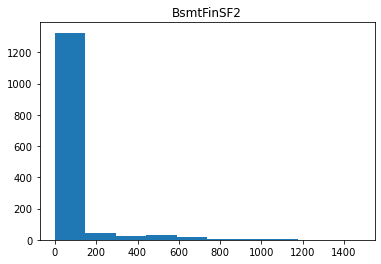

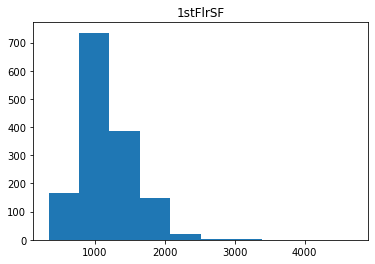

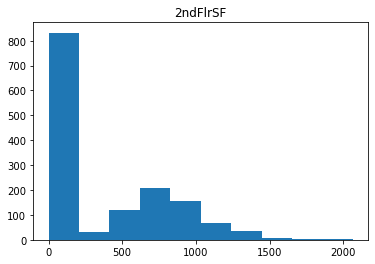

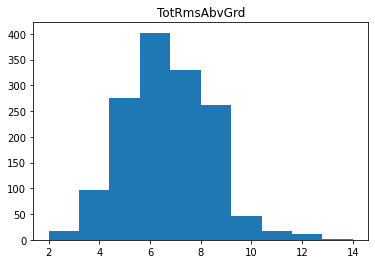

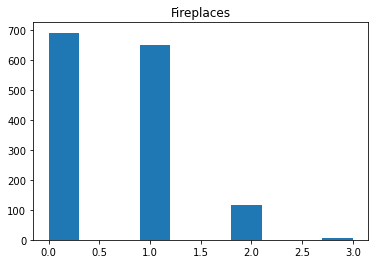

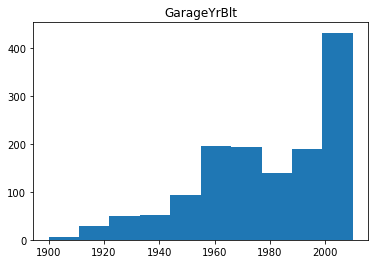

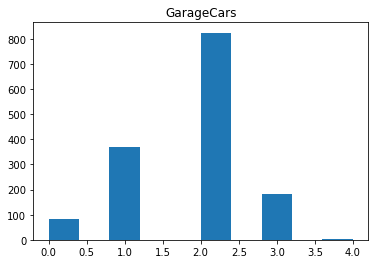

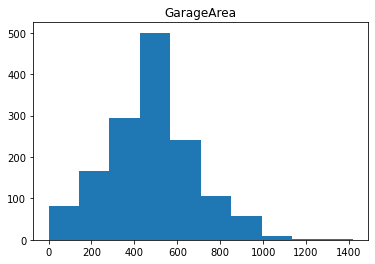

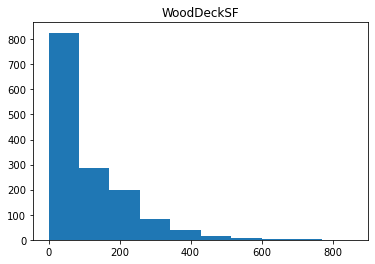

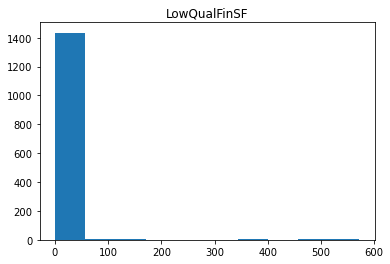

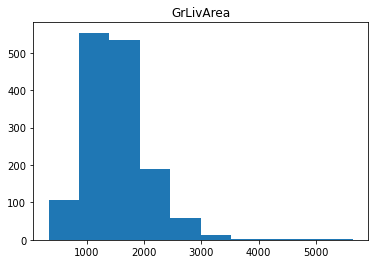

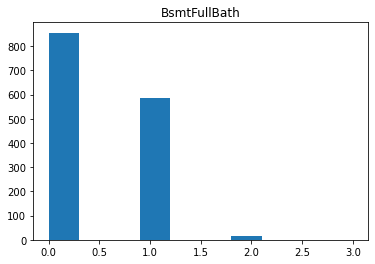

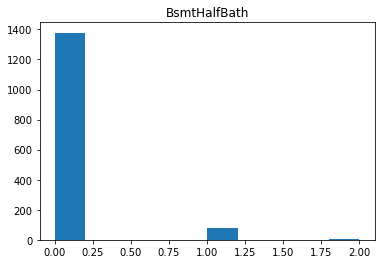

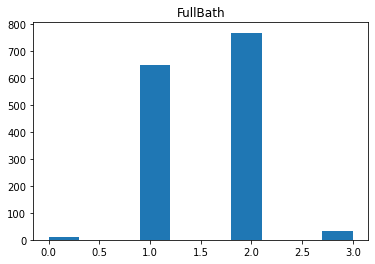

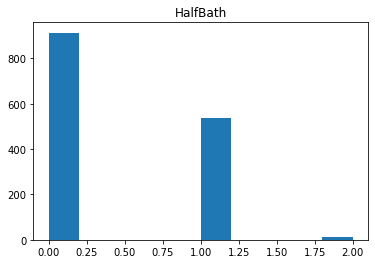

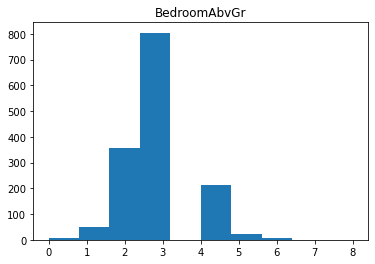

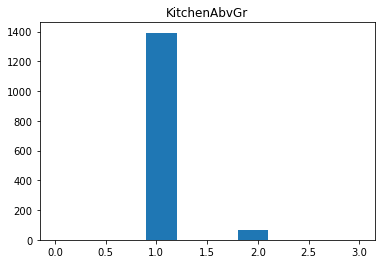

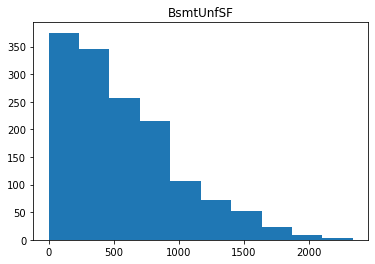

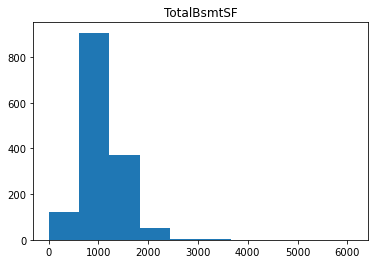

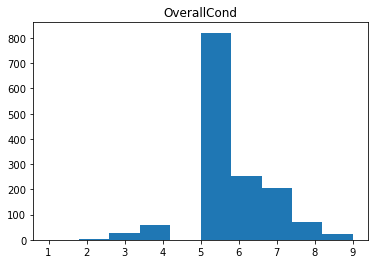

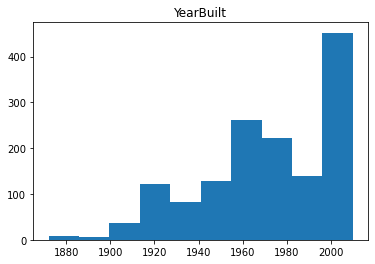

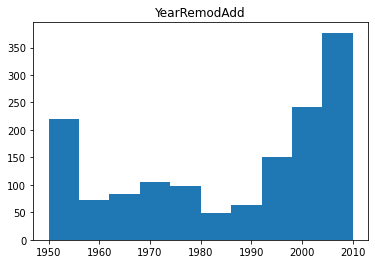

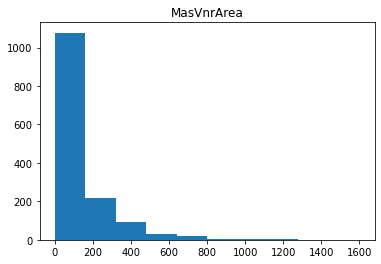

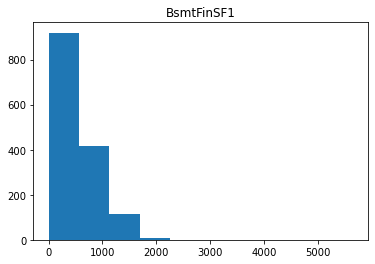

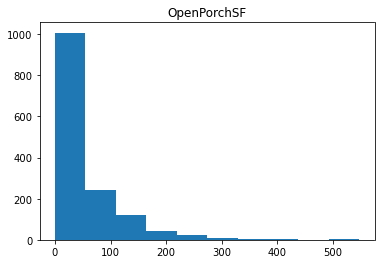

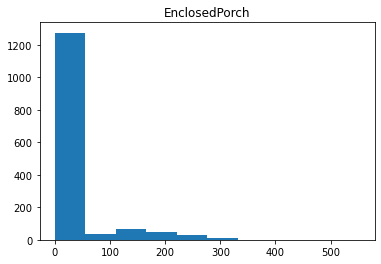

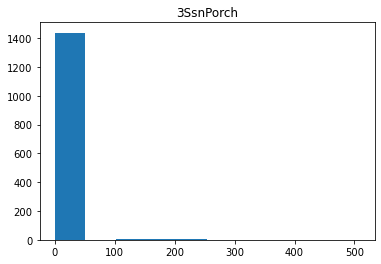

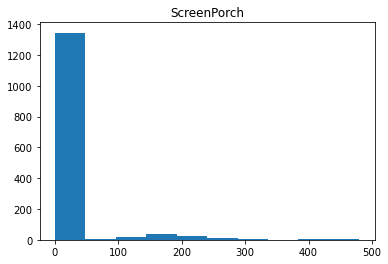

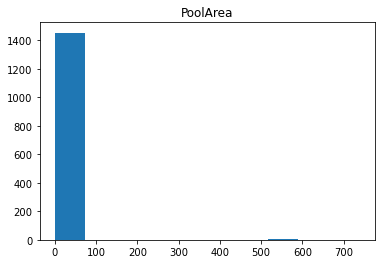

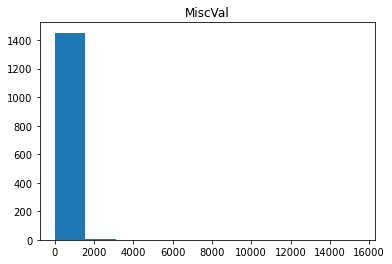

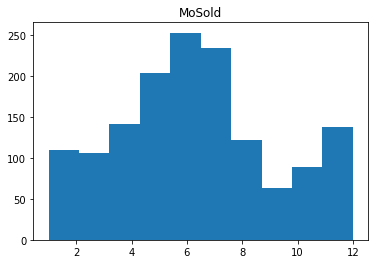

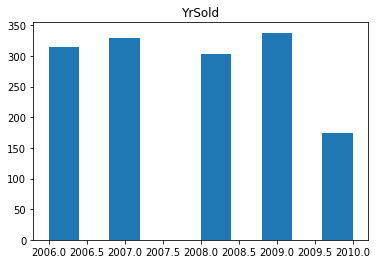

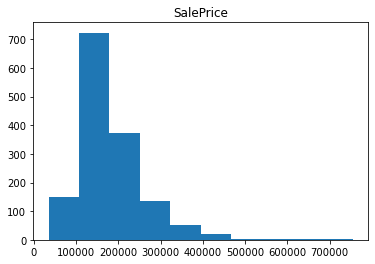

In [8]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

               MSSubClass  LotFrontage   LotArea  OverallQual  BsmtFinSF2  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628   -0.065649   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    0.049900   
LotArea         -0.139781     0.426095  1.000000     0.105806    0.111170   
OverallQual      0.032628     0.251646  0.105806     1.000000   -0.059119   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119    1.000000   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    0.097117   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493   -0.099260   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452   -0.035227   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    0.046921   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766   -0.088011   
GarageCars      -0.040110     0.285691  0.154871     0.600671   -0.038264   
GarageArea      -0.098672     0.344997  0.180403     0.562022   -0.018227   

<AxesSubplot:>

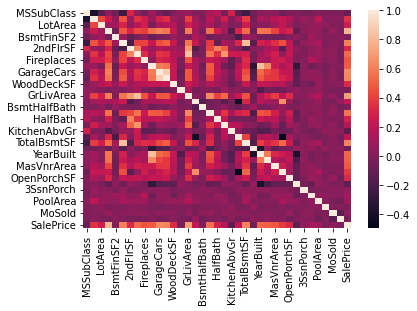

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [10]:
pd.pivot_table(training, index = 'SalePrice', values = ['MSSubClass','LotFrontage','LotArea','OverallQual', 'BsmtFinSF2','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond' ,'YearBuilt' ,'YearRemodAdd','MasVnrArea','BsmtFinSF1','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'])

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
SalePrice,,,,,,,,,,,,,,,,,,,,,
34900,720.0,0.0,0.0,2.0,495.0,0.0,0.0,0.0,225.0,115.0,...,5.0,4.0,0.0,0.0,4.0,720.0,0.0,1920.0,1950.0,2009.0
35311,480.0,0.0,0.0,1.0,50.0,0.0,1.0,0.0,430.0,0.0,...,3.0,2.0,0.0,0.0,4.0,480.0,0.0,1949.0,1950.0,2006.0
37900,600.0,368.0,0.0,2.0,0.0,0.0,0.0,0.0,600.0,0.0,...,6.0,3.0,0.0,0.0,6.0,600.0,0.0,1910.0,1950.0,2009.0
39300,334.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,2.0,0.0,0.0,1946.0,1950.0,2007.0
40000,649.0,668.0,0.0,3.0,0.0,0.0,0.0,0.0,649.0,172.0,...,4.0,4.0,0.0,0.0,6.0,649.0,0.0,1920.0,1950.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582933,1734.0,1088.0,0.0,4.0,0.0,0.0,0.0,0.0,1734.0,0.0,...,5.0,9.0,0.0,192.0,12.0,1734.0,52.0,2008.0,2009.0,2009.0
611657,2364.0,0.0,0.0,2.0,2188.0,0.0,1.0,0.0,142.0,0.0,...,5.0,9.0,0.0,0.0,11.0,2330.0,0.0,2009.0,2010.0,2010.0
625000,1831.0,1796.0,0.0,4.0,1387.0,0.0,1.0,0.0,543.0,0.0,...,5.0,10.0,0.0,0.0,10.0,1930.0,361.0,1995.0,1996.0,2006.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


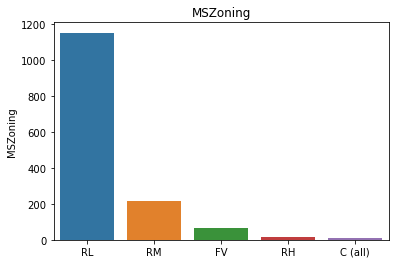

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


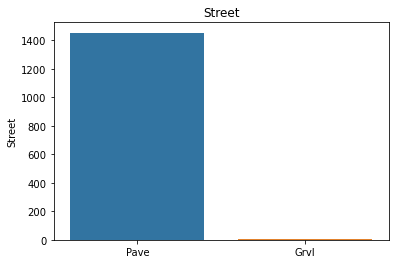

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


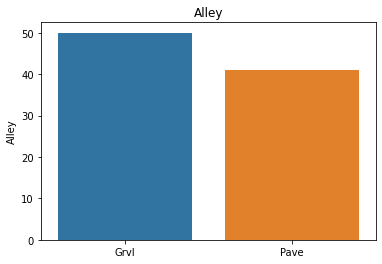

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


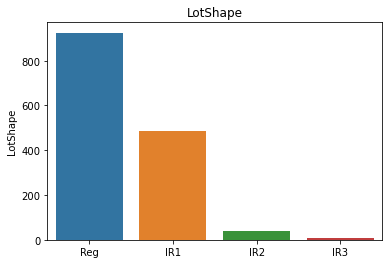

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


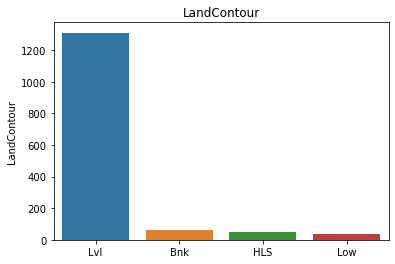

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


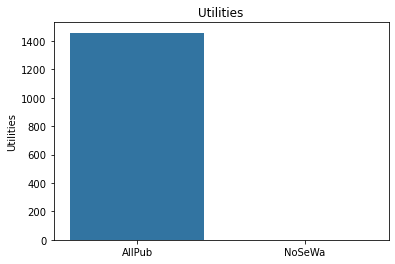

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


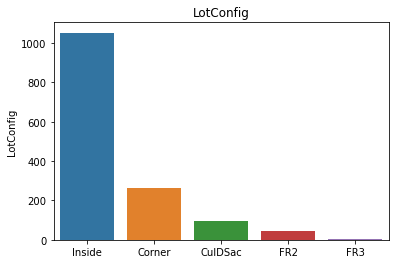

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


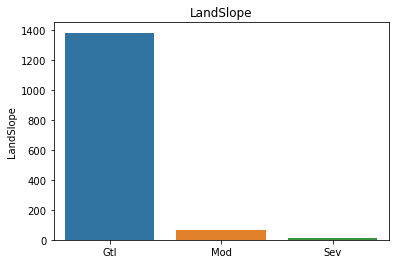

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


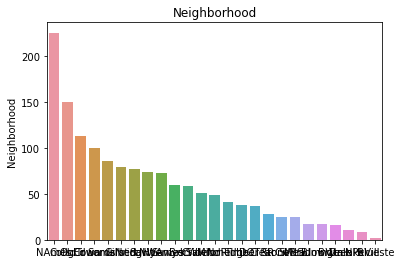

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


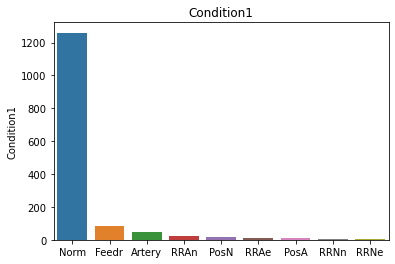

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


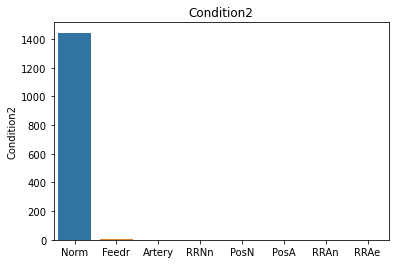

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


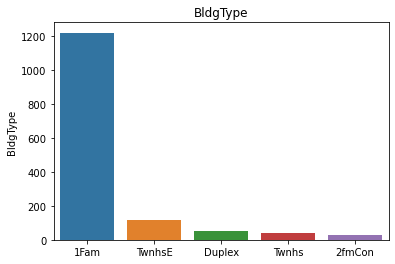

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


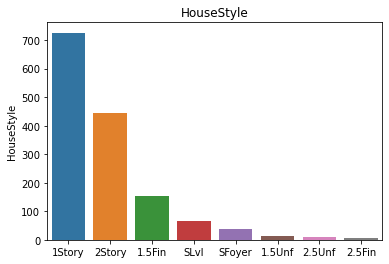

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


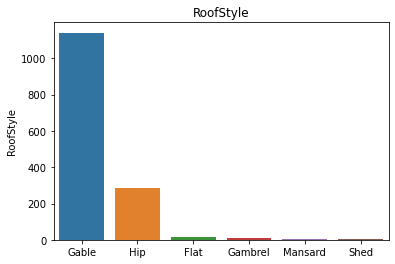

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


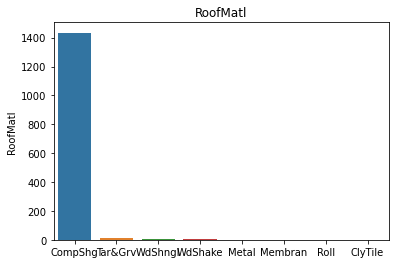

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


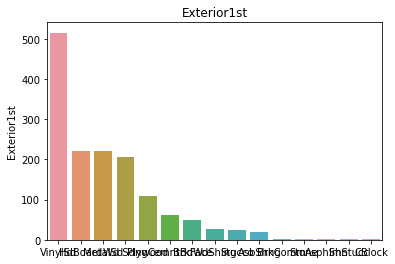

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


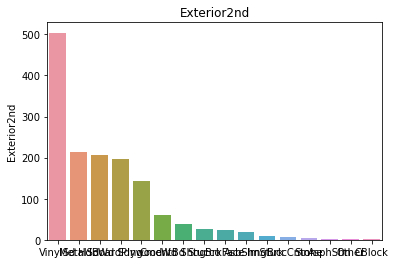

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


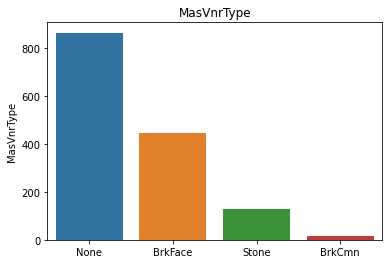

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


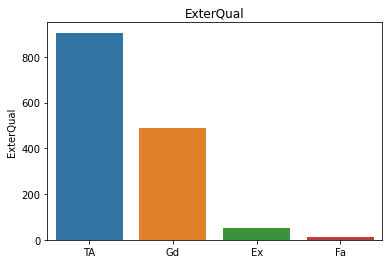

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


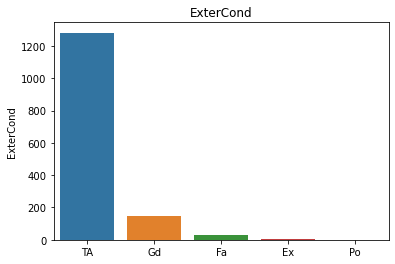

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


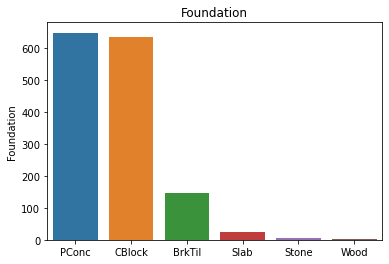

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


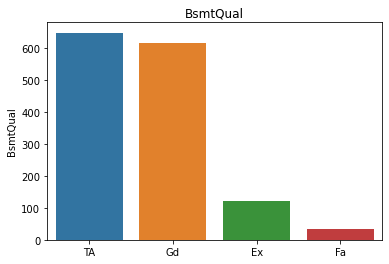

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


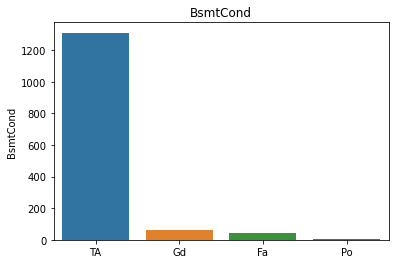

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


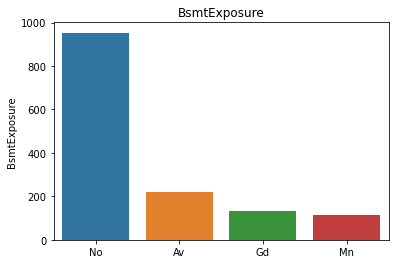

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


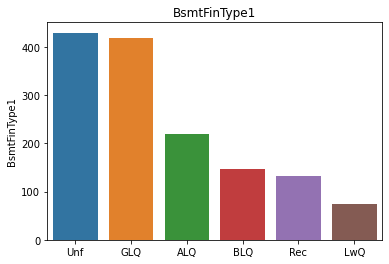

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


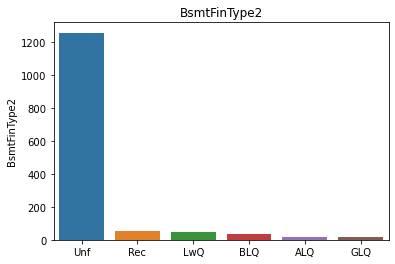

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


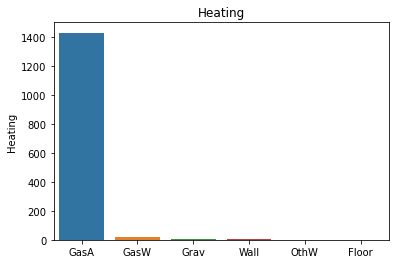

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


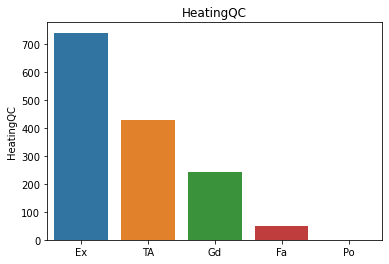

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


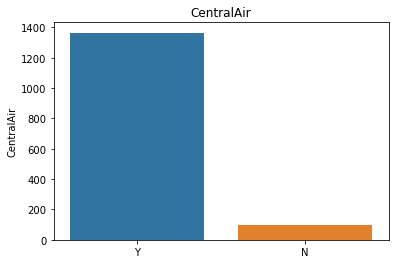

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


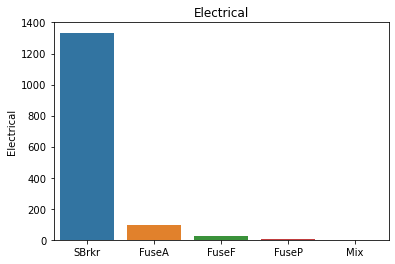

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


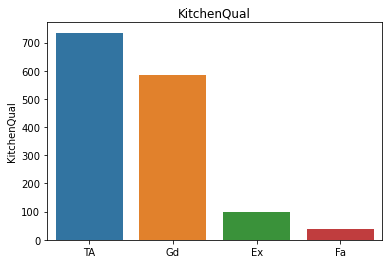

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


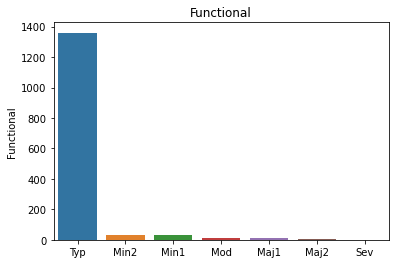

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


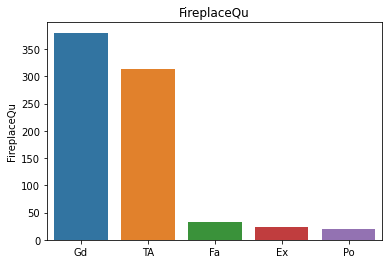

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


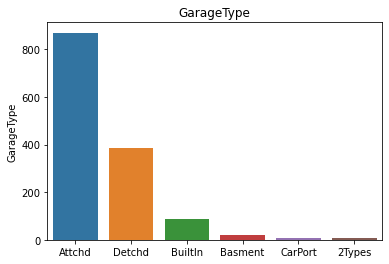

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


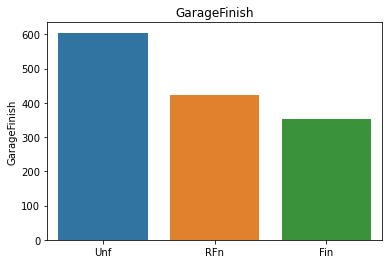

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


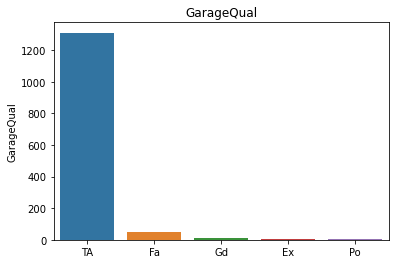

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


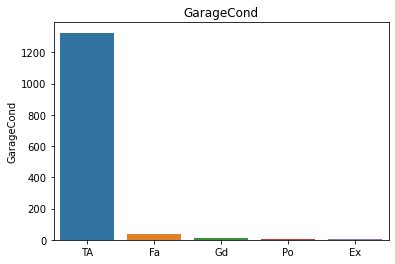

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


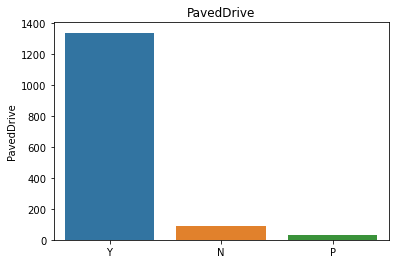

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


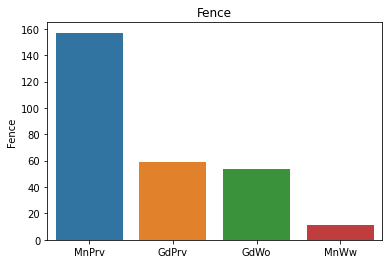

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


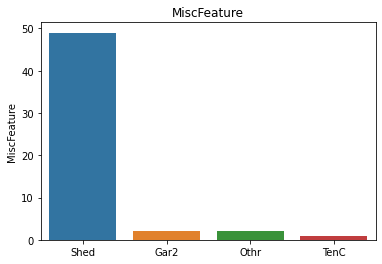

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


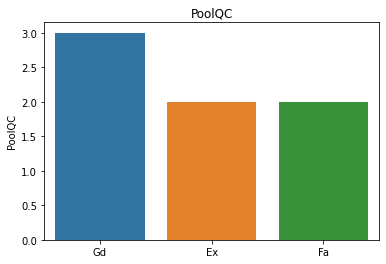

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


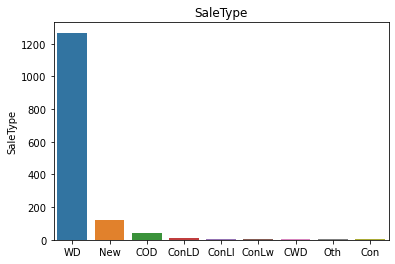

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


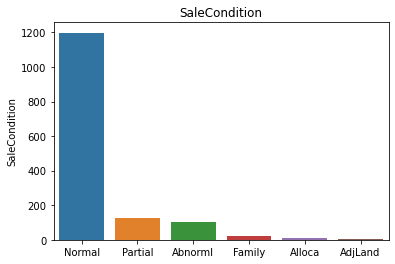

In [11]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
all_data.LotFrontage = all_data.LotFrontage.fillna(training.LotFrontage.median())
all_data.MasVnrArea = all_data.MasVnrArea.fillna(training.MasVnrArea.median())
all_data.GarageYrBlt = all_data.GarageYrBlt.fillna(training.GarageYrBlt.median())

In [13]:
all_data = all_data.drop(columns=['MSSubClass','MSZoning','LandContour','LandSlope','Neighborhood','Condition1'])
all_data = all_data.drop(columns=['Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'])
all_data =all_data.drop(columns=['Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','Heating'])

all_data = all_data.drop(columns=['Electrical','Functional','GarageFinish','PavedDrive','Fence','MiscFeature','HeatingQC'])
all_data = all_data.drop(columns=['MoSold','MiscVal','SaleType','SaleCondition','FireplaceQu','Fireplaces','GarageQual'])
all_data = all_data.drop(columns=['GarageType','Alley','ExterQual','3SsnPorch','ScreenPorch','GarageYrBlt'])
all_data = all_data.drop(columns=['Utilities','LotConfig','Foundation','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2'])

In [14]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [15]:
all_data['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [16]:
all_data['Street'] = all_data['Street'].str.replace("Pave", "0")
all_data['Street'] = all_data['Street'].str.replace("Grvl", "1")
all_data['Street'] = pd.to_numeric(all_data["Street"])

In [17]:
all_data.head()

,Id,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,YrSold,SalePrice,train_test
0,1,65.0,8450,0,Reg,7,5,2003,2003,196.0,...,548.0,TA,0,61,0,0,NaN,2008,12.247699,1
1,2,80.0,9600,0,Reg,6,8,1976,1976,0.0,...,460.0,TA,298,0,0,0,NaN,2007,12.109016,1
2,3,68.0,11250,0,IR1,7,5,2001,2002,162.0,...,608.0,TA,0,42,0,0,NaN,2008,12.317171,1
3,4,60.0,9550,0,IR1,7,5,1915,1970,0.0,...,642.0,TA,0,35,272,0,NaN,2006,11.849405,1
4,5,84.0,14260,0,IR1,8,5,2000,2000,350.0,...,836.0,TA,192,84,0,0,NaN,2008,12.429220,1


In [18]:
all_data['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [19]:
all_data['LotShape'] = all_data['LotShape'].map({'Reg': 1, 'IR1': 0, 'IR2': 0, 'IR3': 0})

In [20]:
all_data.head()

,Id,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,YrSold,SalePrice,train_test
0,1,65.0,8450,0,1,7,5,2003,2003,196.0,...,548.0,TA,0,61,0,0,NaN,2008,12.247699,1
1,2,80.0,9600,0,1,6,8,1976,1976,0.0,...,460.0,TA,298,0,0,0,NaN,2007,12.109016,1
2,3,68.0,11250,0,0,7,5,2001,2002,162.0,...,608.0,TA,0,42,0,0,NaN,2008,12.317171,1
3,4,60.0,9550,0,0,7,5,1915,1970,0.0,...,642.0,TA,0,35,272,0,NaN,2006,11.849405,1
4,5,84.0,14260,0,0,8,5,2000,2000,350.0,...,836.0,TA,192,84,0,0,NaN,2008,12.429220,1


In [21]:
all_data['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [22]:
all_data['ExterCond'] = all_data['ExterCond'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4,'Po':5})

In [23]:
all_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterCond',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'PoolQC', 'YrSold',
       'SalePrice', 'train_test'],
      dtype='object')

In [24]:
all_data

,Id,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,YrSold,SalePrice,train_test
0,1,65.0,8450,0,1,7,5,2003,2003,196.0,...,548.0,TA,0,61,0,0,NaN,2008,12.247699,1
1,2,80.0,9600,0,1,6,8,1976,1976,0.0,...,460.0,TA,298,0,0,0,NaN,2007,12.109016,1
2,3,68.0,11250,0,0,7,5,2001,2002,162.0,...,608.0,TA,0,42,0,0,NaN,2008,12.317171,1
3,4,60.0,9550,0,0,7,5,1915,1970,0.0,...,642.0,TA,0,35,272,0,NaN,2006,11.849405,1
4,5,84.0,14260,0,0,8,5,2000,2000,350.0,...,836.0,TA,192,84,0,0,NaN,2008,12.429220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,0,1,4,7,1970,1970,0.0,...,0.0,NaN,0,0,0,0,NaN,2006,NaN,0
1455,2916,21.0,1894,0,1,4,5,1970,1970,0.0,...,286.0,TA,0,24,0,0,NaN,2006,NaN,0
1456,2917,160.0,20000,0,1,5,7,1960,1996,0.0,...,576.0,TA,474,0,0,0,NaN,2006,NaN,0
1457,2918,62.0,10441,0,1,5,5,1992,1992,0.0,...,0.0,NaN,80,32,0,0,NaN,2006,NaN,0


In [25]:
all_data['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [26]:
all_data['GarageCond'] = all_data['GarageCond'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4,'Po':5})

In [27]:
all_data.head()

,Id,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,YrSold,SalePrice,train_test
0,1,65.0,8450,0,1,7,5,2003,2003,196.0,...,548.0,3.0,0,61,0,0,NaN,2008,12.247699,1
1,2,80.0,9600,0,1,6,8,1976,1976,0.0,...,460.0,3.0,298,0,0,0,NaN,2007,12.109016,1
2,3,68.0,11250,0,0,7,5,2001,2002,162.0,...,608.0,3.0,0,42,0,0,NaN,2008,12.317171,1
3,4,60.0,9550,0,0,7,5,1915,1970,0.0,...,642.0,3.0,0,35,272,0,NaN,2006,11.849405,1
4,5,84.0,14260,0,0,8,5,2000,2000,350.0,...,836.0,3.0,192,84,0,0,NaN,2008,12.429220,1


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   OverallQual    2919 non-null   int64  
 6   OverallCond    2919 non-null   int64  
 7   YearBuilt      2919 non-null   int64  
 8   YearRemodAdd   2919 non-null   int64  
 9   MasVnrArea     2919 non-null   float64
 10  ExterCond      2919 non-null   int64  
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  CentralAir     2919 non-null   object 
 14  1stFlrSF       2919 non-null   int64  
 15  2ndFlrSF       2919 non-null   int64  
 16  LowQualFinSF   2919 non-null   int64  
 17  GrLivArea      2919 non-null   int64  
 18  BsmtFull

In [29]:
all_data['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [30]:
all_data['PoolQC'] = all_data['PoolQC'].map({'Ex': 1, 'Gd': 2,'Fa': 3})

In [31]:
all_data['PoolQC'].isnull().sum()

2909

In [32]:
all_data['PoolQC']=all_data['PoolQC'].fillna(0)

In [33]:
all_data.BsmtUnfSF = all_data.BsmtUnfSF.fillna(training.BsmtUnfSF.median())

In [34]:
all_data.TotalBsmtSF = all_data.TotalBsmtSF.fillna(training.TotalBsmtSF.mean())
all_data.BsmtFullBath = all_data.BsmtFullBath.fillna(training.BsmtFullBath.mean())
all_data.BsmtHalfBath = all_data.BsmtHalfBath.fillna(training.BsmtHalfBath.mean())
all_data.GarageArea  = all_data.GarageArea .fillna(training.GarageArea.mean())

In [35]:
all_data['GarageCond']=all_data['GarageCond'].fillna(0)
all_data['GarageCars']=all_data['GarageCars'].fillna(0)


In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   OverallQual    2919 non-null   int64  
 6   OverallCond    2919 non-null   int64  
 7   YearBuilt      2919 non-null   int64  
 8   YearRemodAdd   2919 non-null   int64  
 9   MasVnrArea     2919 non-null   float64
 10  ExterCond      2919 non-null   int64  
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  CentralAir     2919 non-null   object 
 14  1stFlrSF       2919 non-null   int64  
 15  2ndFlrSF       2919 non-null   int64  
 16  LowQualFinSF   2919 non-null   int64  
 17  GrLivArea      2919 non-null   int64  
 18  BsmtFull

In [37]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [38]:
all_data['KitchenQual'] = all_data['KitchenQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4,'Po':5})

In [39]:
all_data['KitchenQual']=all_data['KitchenQual'].fillna(0)

In [40]:
all_data['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [41]:
all_data['CentralAir'] = all_data['CentralAir'].map({'Y': 1, 'N': 0 })

In [42]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   OverallQual    2919 non-null   int64  
 6   OverallCond    2919 non-null   int64  
 7   YearBuilt      2919 non-null   int64  
 8   YearRemodAdd   2919 non-null   int64  
 9   MasVnrArea     2919 non-null   float64
 10  ExterCond      2919 non-null   int64  
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  CentralAir     2919 non-null   int64  
 14  1stFlrSF       2919 non-null   int64  
 15  2ndFlrSF       2919 non-null   int64  
 16  LowQualFinSF   2919 non-null   int64  
 17  GrLivArea      2919 non-null   int64  
 18  BsmtFull

In [43]:
all_dummies = pd.get_dummies(all_data[['LotFrontage','LotArea','OverallQual','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd',
        'GarageCars', 'GarageArea','WoodDeckSF',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond' ,'YearBuilt' ,'YearRemodAdd',
       'MasVnrArea','EnclosedPorch','OpenPorchSF','PoolArea','GrLivArea',
       'YrSold','Street','train_test','LowQualFinSF',
        'LotShape', 'ExterCond','CentralAir','KitchenQual','GarageCond','PoolQC']])

In [44]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


In [45]:
y_train = all_data[all_data.train_test==1].SalePrice
y_train.shape

(1460,)

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['LotFrontage','LotArea','OverallQual','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd',
        'GarageCars', 'GarageArea','WoodDeckSF',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond' ,'YearBuilt' ,'YearRemodAdd',
       'MasVnrArea','EnclosedPorch','OpenPorchSF','PoolArea','GrLivArea',
       'YrSold','LowQualFinSF',]]= scale.fit_transform(all_dummies_scaled[['LotFrontage','LotArea','OverallQual','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd',
        'GarageCars', 'GarageArea','WoodDeckSF',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond' ,'YearBuilt' ,'YearRemodAdd',
       'MasVnrArea','EnclosedPorch','OpenPorchSF','PoolArea','GrLivArea',
       'YrSold','LowQualFinSF']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].SalePrice

In [47]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [48]:
models = [Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
model_names = ['Lasso', 'Ridge', 'ElasticNet', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']


In [49]:
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    print(f'{name} train score: {score}')

Lasso train score: 0.7651331279530782
Ridge train score: 0.865163837643777
ElasticNet train score: 0.7799303329157425
RandomForestRegressor train score: 0.981141206251206
GradientBoostingRegressor train score: 0.9452828334623407
XGBRegressor train score: 0.9989668607531454


In [50]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [51]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)
grid.fit(X_train,y_train)
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')


Best parameters: {'alpha': 10}
Best score: 0.8335923827201043


In [52]:
model = grid.best_estimator_
test_predictions = np.exp(model.predict(X_test))
output = pd.DataFrame({'Id': test.Id, 'SalePrice': test_predictions})
output.to_csv('submission_hp.csv', index=False)